In [1]:
import numpy as np

Rx = np.array([[5,-1,-2],[-1,5,-1],[-2,-1,5]])
ryx = np.array([1,5.3,-3.9])

1.2.1 a) $$w_0 = R_x^{-1}*r_{yx}$$

In [2]:
w0 = np.linalg.solve(Rx,ryx)
print(w0)

[ 0.2  1.  -0.5]


1.2.1 b) $$E[xe] = E[x(y-xW)] = E[xy] - E[xx] * W = r_{xy} - R_x * W, W = R_x^{-1} * r_{xy} $$<br>
         $$E[xe] = r_{xy} - R_x * R_x^{-1} * r_{xy} = 0$$

1.2.1 c) using LS, assume ergodicity 
$$ \hat{R_x} = \sum(x[k] * x[k])/N $$
$$ \hat{r_{xy}} = \sum(x[k] * y[k])/N

1.2.2 d) when k --> infinity <br>
$$ w[k] = w_0 = R_x^{-1} * r_{xy} $$

1.2.2 e) $$a < 1/\lambda_{max}$$

In [3]:
lamb = np.linalg.eigvals(Rx)
lamb_max = max(lamb)
a = 1/lamb_max
print('elgvals =', lamb)
print('a_max =', a)

elgvals = [2.26794919 7.         5.73205081]
a_max = 0.1428571428571429


1.2.2 f) GD: $$ w[k+1] = w[k] + 2\alpha (r_{yx} - R_xw[k]) $$

In [89]:
import csv
from matplotlib import pyplot as plt
csv_reader = csv.reader(open("assignment1_data.csv"))

x = []
y = []
data = []

for row in csv_reader:
    x.append(float(row[0]))
    y.append(float(row[1]))
    data.append(row)

data = np.array(data)
x = np.array(x)
y = np.array(y)
print('data_shape =',data.shape)

data_shape = (10000, 2)


In [10]:
print(x)
print(y)

['0' '-1.1041' '0.31334' ... '-3.2319' '3.5742' '1.4207']
['0.34438' '-0.17451' '-0.66892' ... '0.46254' '-3.259' '5.2679']


In [211]:
w = np.array([0,0,0])
log = []
w_0 = []
w_1 = []
w_2 = []
a = 0.01
for i in range(data.shape[0]):
    log.append(w)
    w_0.append(w[0])
    w_1.append(w[1])
    w_2.append(w[2])
    w = w + 2*a*(ryx-Rx@w)
log = np.array(log)
w_0 = np.array(w_0)
w_1 = np.array(w_1)
w_2 = np.array(w_2)
print(w)

[ 0.2  1.  -0.5]


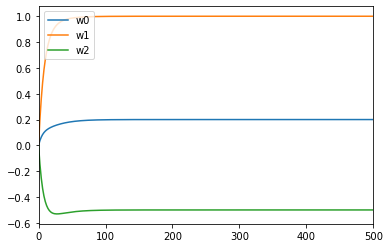

In [212]:
plt.plot(w_0)
plt.plot(w_1)
plt.plot(w_2)
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])

1.2.3 g)

1.2.3 h) $$ \alpha \in (0,1) $$

1.2.3 i) Newton: $$ w[k+1] = w[k] + 2\alpha R_x^{-1} (r_{yx} - R_xw[k]) $$

In [226]:
def Newton(a):
    w = np.array([0,0,0])
    log = []
    w_0 = []
    w_1 = []
    w_2 = []
    invR = np.linalg.inv(Rx)
    for i in range(data.shape[0]):
        log.append(w)
        w_0.append(w[0])
        w_1.append(w[1])
        w_2.append(w[2])
        w = w + 2*a*invR@(ryx-Rx@w)
    log = np.array(log)
    w_0 = np.array(w_0)
    w_1 = np.array(w_1)
    w_2 = np.array(w_2)
    return [w_0,w_1,w_2]


Text(0.5, 1.0, 'a = 0.05')

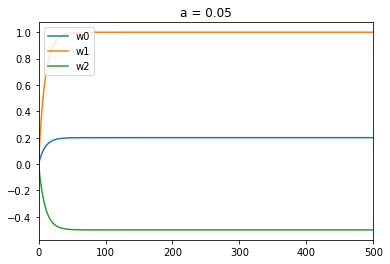

In [227]:
W = Newton(0.05)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.05')

Text(0.5, 1.0, 'a = 0.01')

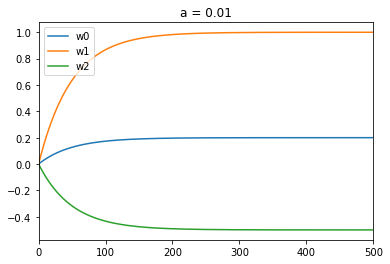

In [228]:
W = Newton(0.01)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.01')

Text(0.5, 1.0, 'a = 0.1')

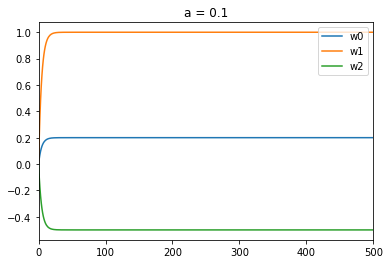

In [229]:
W = Newton(0.1)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.1')

1.3.1 j)

In [232]:
def LMS(x, y, N, a):
    L = min(len(x),len(y))
    w = np.zeros(N)
    e = np.zeros(L-N)
    w_0 = []
    w_1 = []
    w_2 = []
    for k in range(L-N):
        w_0.append(w[0])
        w_1.append(w[1])
        w_2.append(w[2])
        x_k = x[k:k+N]
        y_k = y[k+N]
        y_h = w@x_k
        e_k = y_k - y_h
        w = w + 2 * a * e_k * x_k
    w_0 = np.array(w_0)
    w_1 = np.array(w_1)
    w_2 = np.array(w_2)
    return [w_0,w_1,w_2]

Text(0.5, 1.0, 'a = 0.001')

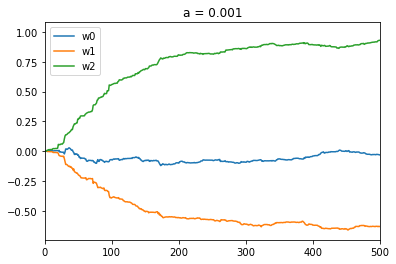

In [241]:
W = LMS(x,y,3,0.001)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.001')

Text(0.5, 1.0, 'a = 0.005')

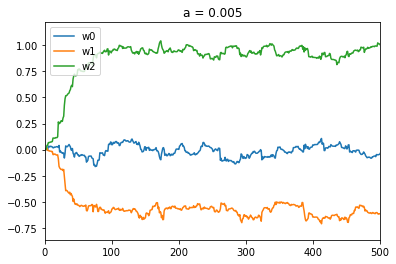

In [235]:
W = LMS(x,y,3,0.005)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.005')

Text(0.5, 1.0, 'a = 0.01')

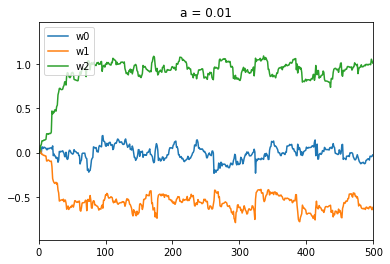

In [237]:
W = LMS(x,y,3,0.01)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.01')

Text(0.5, 1.0, 'a = 0.02')

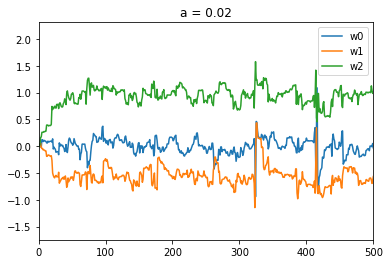

In [240]:
W = LMS(x,y,3,0.02)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.02')

1.3.1 k)

In [242]:
def NLMS(x, y, N = 3, a = 0.2):
    L = min(len(x),len(y))
    w = np.zeros(N)
    e = np.zeros(L-N)
    w_0 = []
    w_1 = []
    w_2 = []
    for k in range(L-N):
        w_0.append(w[0])
        w_1.append(w[1])
        w_2.append(w[2])
        x_k = x[k:k+N]
        y_k = y[k+N]
        y_h = w@x_k
        e_k = y_k - y_h
        w = w + 2 * a * e_k * x_k / (x_k@x_k/N + 1e-8)
    w_0 = np.array(w_0)
    w_1 = np.array(w_1)
    w_2 = np.array(w_2)
    return [w_0,w_1,w_2]


Text(0.5, 1.0, 'a = 0.001')

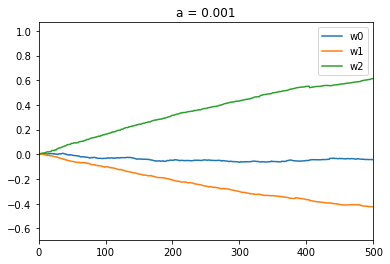

In [243]:
W = NLMS(x,y,3,0.001)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.001')

Text(0.5, 1.0, 'a = 0.005')

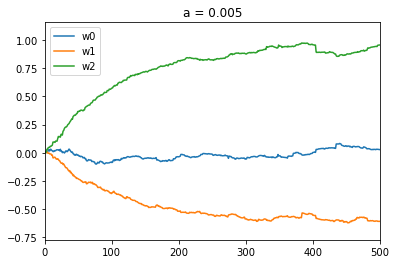

In [246]:
W = NLMS(x,y,3,0.005)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.005')

Text(0.5, 1.0, 'a = 0.01')

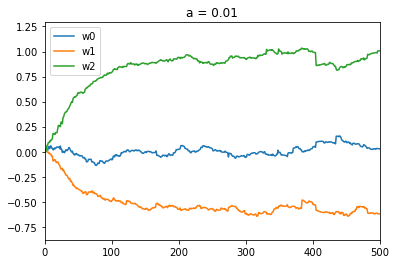

In [247]:
W = NLMS(x,y,3,0.01)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.01')

Text(0.5, 1.0, 'a = 0.02')

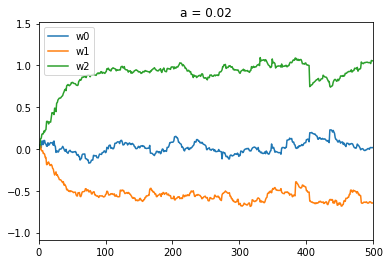

In [248]:
W = NLMS(x,y,3,0.02)
plt.plot(W[0])
plt.plot(W[1])
plt.plot(W[2])
plt.xlim([0,500])
plt.legend(['w0','w1','w2'])
plt.title('a = 0.02')

1.3.1 l)

1.3.2 m)

In [ ]:
def RLS(x, y, N, a, r):
    

1.3.2 n)